In [1]:
%matplotlib inline

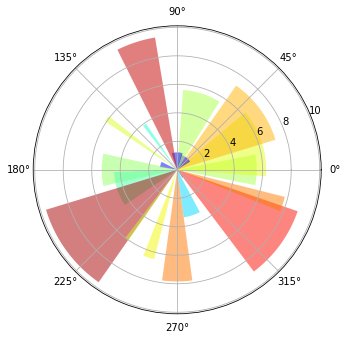

In [2]:
from pylab import *

axes([0,0,1,1], polar=True)

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor( cm.jet(r/10.))
    bar.set_alpha(0.5)

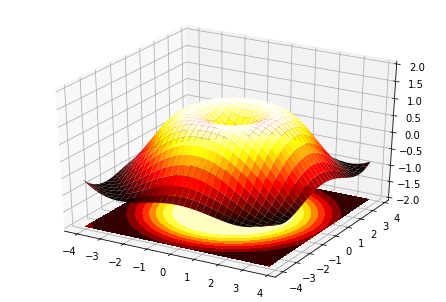

In [3]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=cm.hot)
o = ax.set_zlim(-2,2)

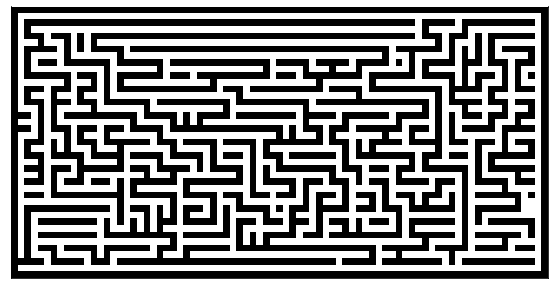

In [4]:
import numpy
from numpy.random import randint as rand
import matplotlib.pyplot as pyplot
 
def maze(width=81, height=51, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * (shape[0] // 2 * shape[1] // 2))
    # Build actual maze
    Z = numpy.zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make isles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z
 
pyplot.figure(figsize=(10, 5))
pyplot.imshow(maze(80, 40), cmap=pyplot.cm.binary, interpolation='nearest')
o = pyplot.xticks([]), pyplot.yticks([])

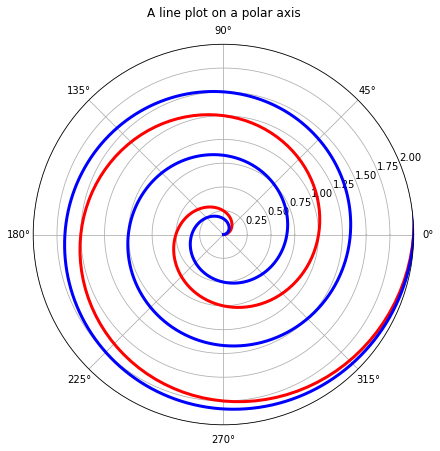

In [5]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 3.0, 0.01)
theta = 2 * np.pi * r

r2 = np.arange(0, 3.0, 0.001) 
theta2 = 3.0 * np.pi * r2 

f = figure(figsize=(14,7))
ax = plt.subplot(111, polar=True)
ax.plot(theta, r, color='r', linewidth=3)
ax.plot(theta2, r2, color='b', linewidth=3)
ax.set_rmax(2.0)
ax.grid(True)
o = ax.set_title("A line plot on a polar axis", va='bottom')

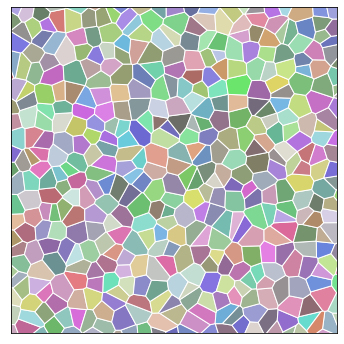

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def circumcircle(P1,P2,P3):
    ''' 
    Adapted from:
    http://local.wasp.uwa.edu.au/~pbourke/geometry/circlefrom3/Circle.cpp
    '''
    delta_a = P2 - P1
    delta_b = P3 - P2
    epsilon = 0.000000001
    if np.abs(delta_a[0]) <= epsilon and np.abs(delta_b[1]) <= epsilon:
        center_x = 0.5*(P2[0] + P3[0])
        center_y = 0.5*(P1[1] + P2[1])
    else:
        aSlope = delta_a[1]/delta_a[0]
        bSlope = delta_b[1]/delta_b[0]
        if np.abs(aSlope-bSlope) <= epsilon:
            return None
        center_x= (aSlope*bSlope*(P1[1] - P3[1]) + bSlope*(P1[0] + P2 [0]) \
                        - aSlope*(P2[0]+P3[0]) )/(2* (bSlope-aSlope) )
        center_y = -1*(center_x - (P1[0]+P2[0])/2)/aSlope +  (P1[1]+P2[1])/2;
    radius = np.sqrt( (center_x - P1[0])**2+(center_y - P1[1])**2)
    return center_x, center_y, radius

def voronoi(X,Y):
    P = np.zeros((X.size,2))
    P[:,0] = X
    P[:,1] = Y
    D = matplotlib.tri.Triangulation(X,Y)
    T = D.triangles
    n = T.shape[0]
    C = np.zeros((n,3))

    # Get circle for each triangle, center will be a voronoi cell point
    cells = []
    for i in range(X.size):
        cells.append( list() )
    for i in range(n):
        C[i] = circumcircle(P[T[i,0]],P[T[i,1]],P[T[i,2]])
        x,y,r = C[i]
        cells[T[i,0]].append( (x,y) )
        cells[T[i,1]].append( (x,y) )
        cells[T[i,2]].append( (x,y) )

    # Reordering cell points in trigonometric way
    for i,cell in enumerate(cells):
        xy = np.array(cell)
        I = np.argsort(np.arctan2(xy[:,1]-Y[i],xy[:,0]-X[i]))
        cell = xy[I].tolist()
        cell.append(cell[0])
        cells[i] = cell
    return cells

import matplotlib.path as mpath

X,Y = np.meshgrid(np.linspace(-0.1,1.1,25), np.linspace(-0.1,1.1,25))
X = X.ravel() + np.random.uniform(-0.025,0.025,X.size)
Y = Y.ravel() + np.random.uniform(-0.025,0.025,Y.size)
cells = voronoi(X,Y)

fig = plt.figure(figsize=(8,6))
axes = plt.subplot(111, aspect=1)
for cell in cells:
    codes = [matplotlib.path.Path.MOVETO] \
          + [matplotlib.path.Path.LINETO] * (len(cell)-2) \
          + [matplotlib.path.Path.CLOSEPOLY]
    path = matplotlib.path.Path(cell,codes)
    color = np.random.uniform(.4,.9,3)
    patch = matplotlib.patches.PathPatch(
        path, facecolor=color, edgecolor='w', zorder=-1)
    axes.add_patch(patch)

plt.axis([0,1,0,1])
o = plt.xticks([]), plt.yticks([])

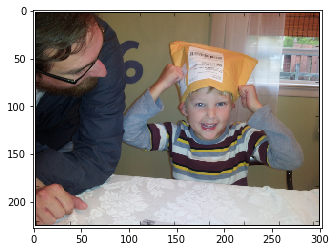

In [7]:
import matplotlib.image as mpimg
img = mpimg.imread('./images/king-silly.png')
imgplot = plt.imshow(img)

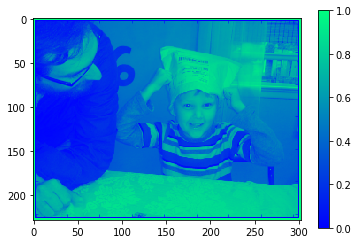

In [8]:
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)
#imgplot.set_cmap('hot')
imgplot.set_cmap('winter')
o = plt.colorbar()

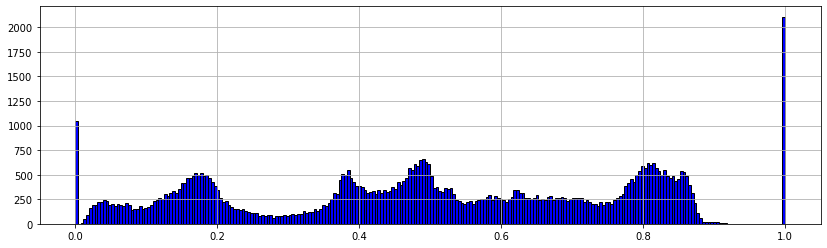

In [9]:
# Histogram of luminances(?) in image.
f = figure(figsize=(14,4))
x = plt.hist(lum_img.flatten(), 256, range=(0.0,1.0), fc='b', ec='k')
ax = gca()
ax.grid(b=True)

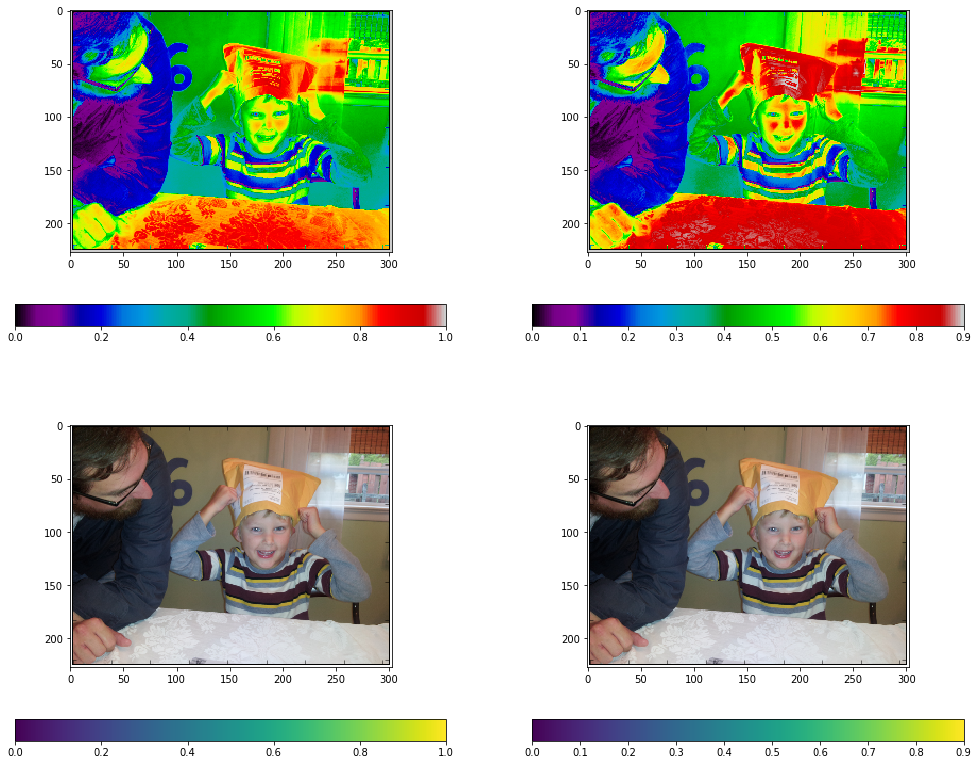

In [10]:
color_map = 'nipy_spectral'
fig = figure(figsize=(17,14))
ax = fig.add_subplot('221')
imgplot = plt.imshow(lum_img, cmap=color_map)
plt.colorbar(orientation='horizontal')
ax = fig.add_subplot('222')
imgplot = plt.imshow(lum_img, cmap=color_map)
imgplot.set_clim(0.0,0.9)
plt.colorbar(orientation='horizontal')
ax = fig.add_subplot('223')
imgplot = plt.imshow(img)
plt.colorbar(orientation='horizontal')
ax = fig.add_subplot('224')
imgplot = plt.imshow(img)
imgplot.set_clim(0.0,0.9)
o = plt.colorbar(orientation='horizontal')

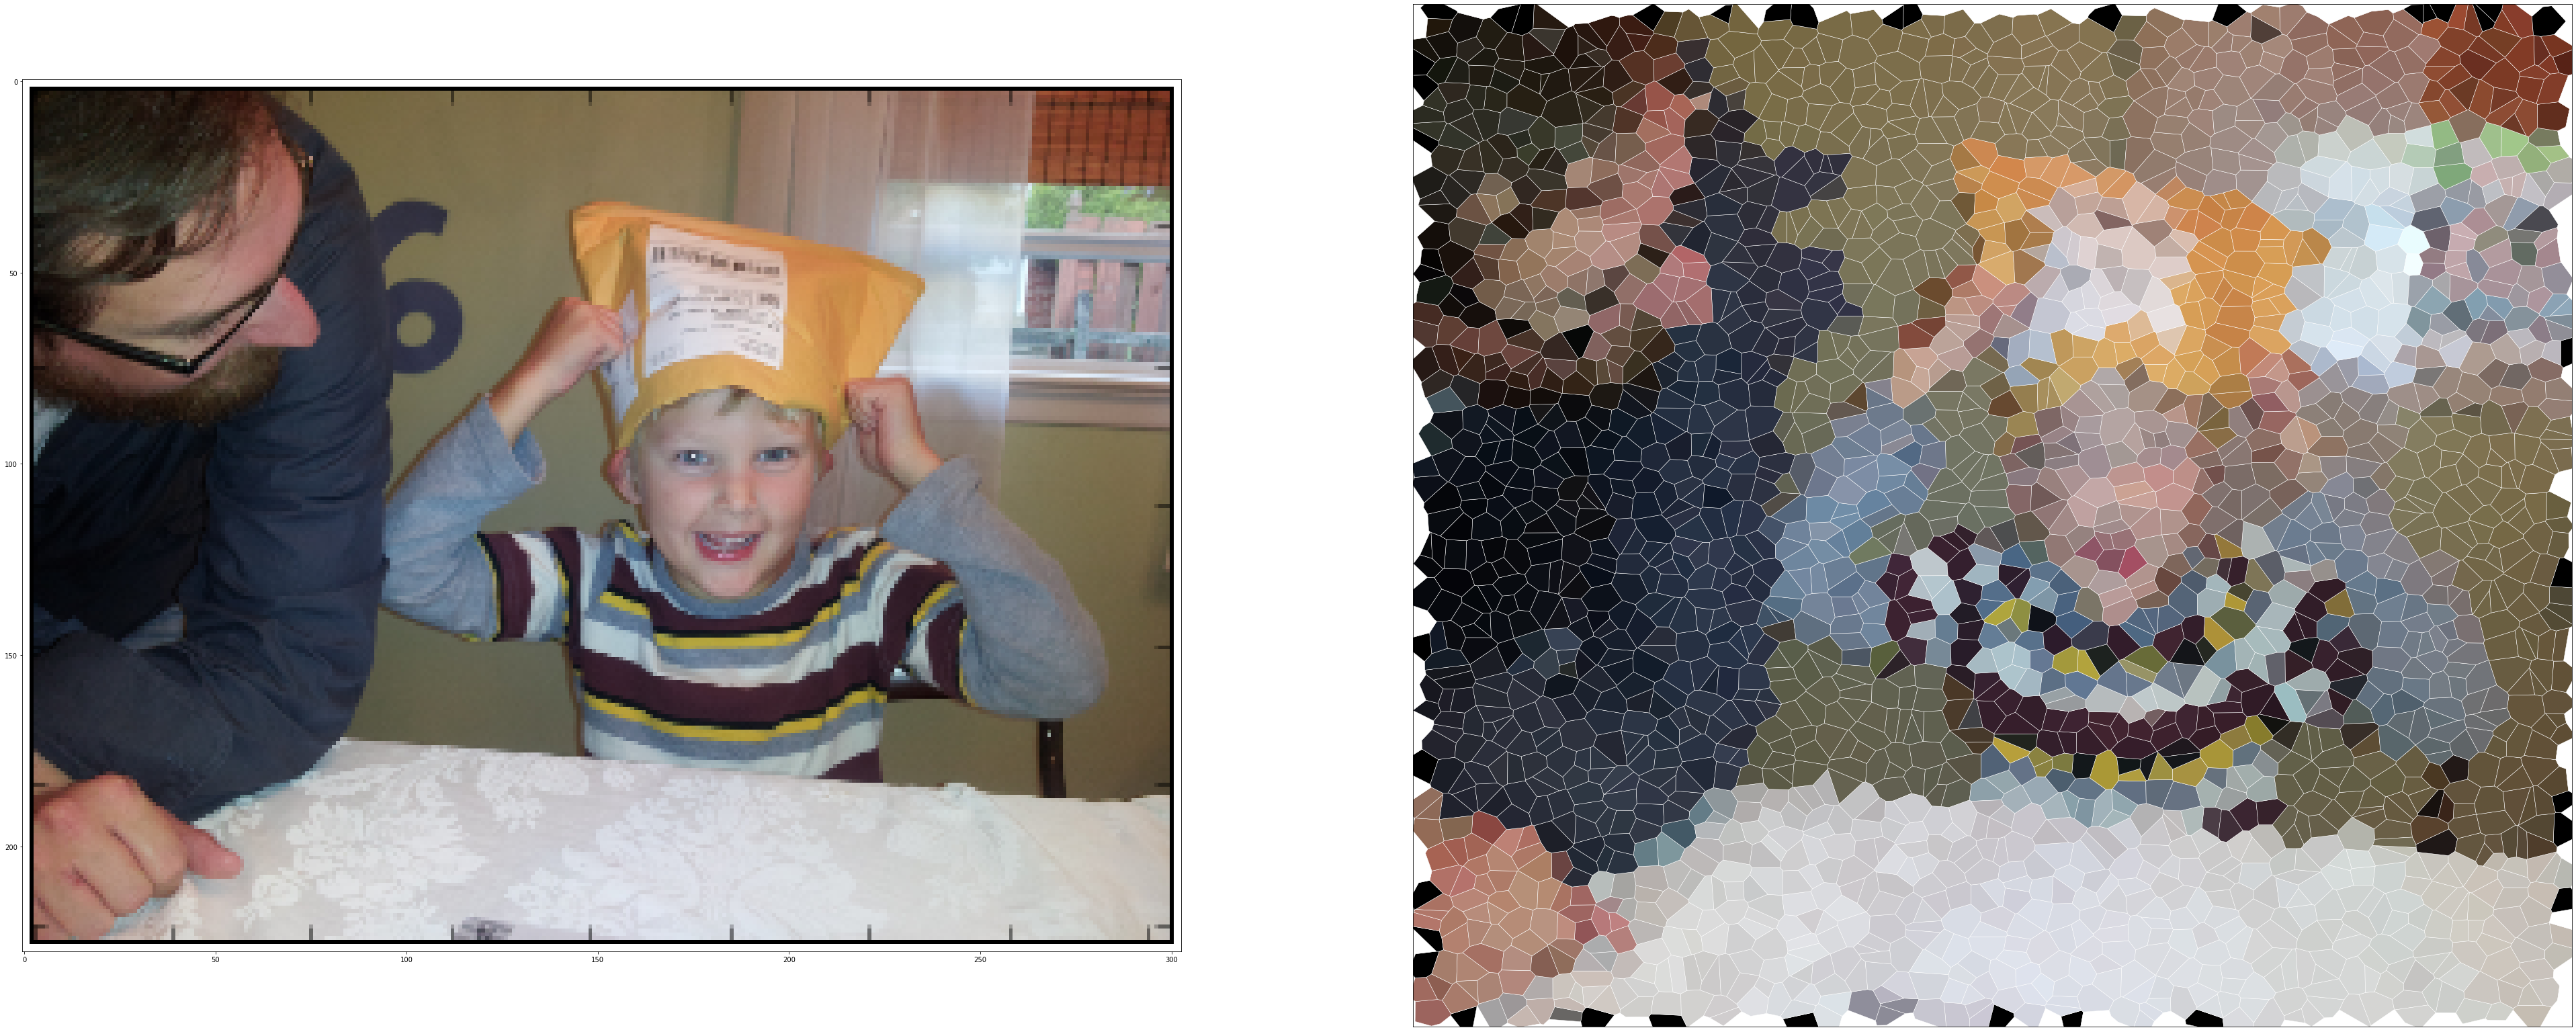

In [14]:
def tileize(img, ax=None, tile_factor=50):
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt

    #X,Y = np.meshgrid(np.linspace(-0.1,1.1,50), np.linspace(-0.1,1.1,50))
    X,Y = np.meshgrid(np.linspace(-0.1,1.1,tile_factor), np.linspace(-0.1,1.1,tile_factor))
    X = X.ravel() + np.random.uniform(-0.0125,0.0125,X.size)
    Y = Y.ravel() + np.random.uniform(-0.0125,0.0125,Y.size)
    cells = voronoi(X,Y)

    if ax is None:
        fig = plt.figure(figsize=(8,6))
        axes = plt.subplot(111, aspect=1)
    else:
        axes = ax
    for i,cell in enumerate(cells):
        codes = [matplotlib.path.Path.MOVETO] \
            + [matplotlib.path.Path.LINETO] * (len(cell)-2) \
            + [matplotlib.path.Path.CLOSEPOLY]
        path = matplotlib.path.Path(cell,codes)

        x,y = 1-max(min(Y[i],1),0), max(min(X[i],1),0)
        x = int(x*(img.shape[0]-1))
        y = int(y*(img.shape[1]-1))
        color = img[x,y]
        patch = matplotlib.patches.PathPatch(
            path, facecolor=color, edgecolor='w', linewidth=.5, zorder=-1)
        axes.add_patch(patch)

    plt.axis([0,1,0,1])
    plt.xticks([]), plt.yticks([])
    
import matplotlib.image as mpimg
fig = figure(figsize=(17*4,7*4))
ax = fig.add_subplot(121)
img = mpimg.imread('./images/king-silly.png')
ax.imshow(img)
ax = fig.add_subplot(122)
tileize(img, ax=ax, tile_factor=60)